AR (Auto Regression) Models

Regression: Used to predict continuous value of an item based on certain parameters.
Auto: Uses its own past values to predict future values.


y(t) = C1*y(t-1) + C2 => AR(1): First order regression
y(t) = C1 + C2*y(t-1) + C3*y(t-2 )=> AR(2): Second order regression


ACF and PACF

Correlation: An indicator of relationship between wo variables 
Auto-correlation: Relationship of a variable with its previous time period values (Lags)
Pearson's correlation coefficient:  [-1,1]

Auto-correlation function: Direct and indirect effect of values in previous time lags
Partial auto-correlation function: Only direct effect of values in previous time lags

We use PACF for auto-regression

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [33]:
df=pd.read_csv('./data/1_Daily_minimum_temps.csv',index_col=0,parse_dates=True)
df

C:\Users\ayush\AppData\Local\Temp\ipykernel_19836\3973834847.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('./data/1_Daily_minimum_temps.csv',index_col=0,parse_dates=True)


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [34]:
X=df.values
X

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [35]:
df.shape

(3650, 1)

In [36]:
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')

In [37]:
df.shape

(3650, 1)

<Axes: xlabel='Date'>

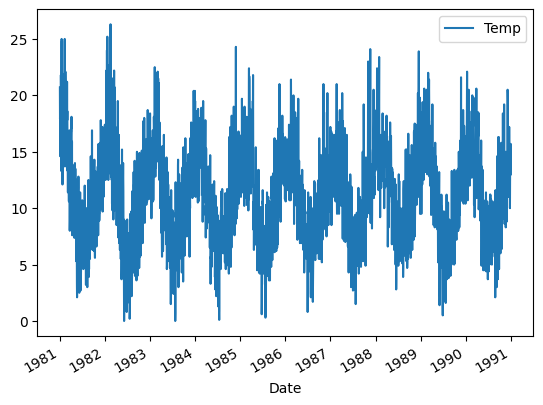

In [38]:
df.plot()

Check for stationaraty

In [39]:
df = df.dropna()

In [40]:
from statsmodels.tsa.stattools import adfuller
dftest= adfuller(df['Temp'],autolag='AIC')

In [41]:
print("ADF:",dftest[0])
print("P-value:",dftest[1])
print("no. of lags:",dftest[2])
print("no. of observations used for ADF regression and critical value calculation:",dftest[3])
for key,val in dftest[4].items():
    print("\t",key,":",val)

ADF: -4.4448049246117
P-value: 0.0002470826300360994
no. of lags: 20
no. of observations used for ADF regression and critical value calculation: 3629
	 1% : -3.4321532327220154
	 5% : -2.862336767636517
	 10% : -2.56719413172842


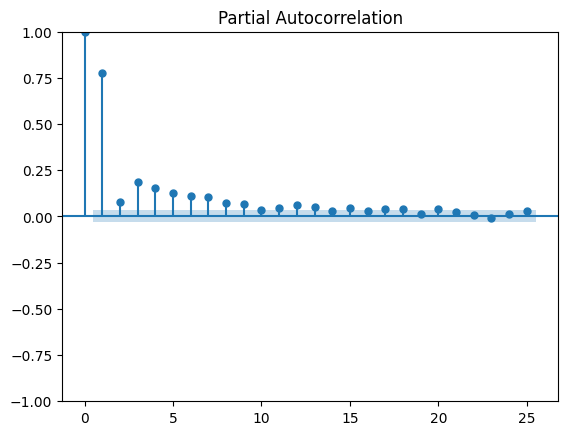

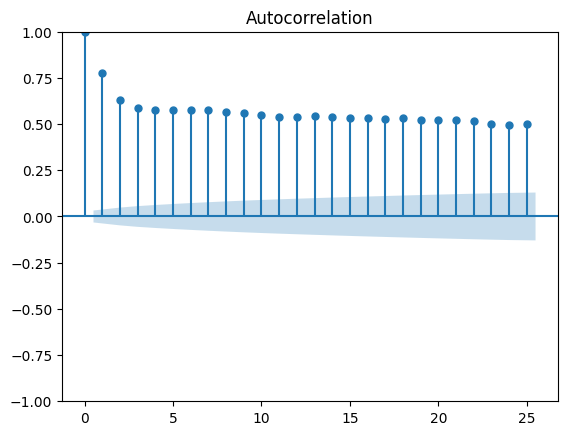

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df['Temp'],lags=25)
acf=plot_acf(df['Temp'],lags=25)

Split data into test and train:last 7 days

In [43]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [44]:
model=AutoReg(train,lags=10).fit()

In [45]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Sat, 10 Aug 2024   AIC                          16775.028
Time:                        22:59:33   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [46]:
print(len(train))

3643


Make prediction on test

In [47]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


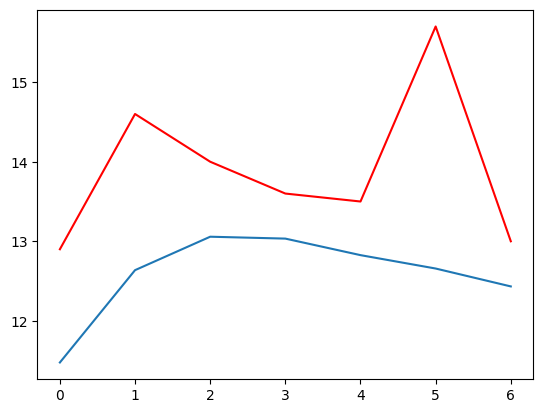

In [48]:
plt.plot(pred)
plt.plot(test,color='red')
print(pred)

Error calculation

In [49]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

1.5638196220860736


Future predictions

In [50]:
pred_future=model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print("Next week prediction:",pred_future)
print("number of predictions made: \t",len(pred_future))

Next week prediction: [12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]
number of predictions made: 	 7
